# Ryan's Sign Data

In [2]:
import pandas as pd
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import numpy as np

In [3]:
signsData = pd.read_csv("Signs.csv")
hoodData = pd.read_csv("RAC223Neighborhoods_.csv")

In [4]:
signsDescData = signsData.groupby(['description']).count()


- Blind Pedestrian Crossing
- Lane Ends
- Movement Prohibition - No Left Turn
- Movement Prohibition - No Right Turn
- Movement Prohibition - No Turns
- Movement Prohibition - No U-Turns
- Yield
- Yield to Peds in Crosswalk
- Wrong Way
- Watch Children
- Speed Limit
- Stop
- Stop Here on Red
- School
- One Way

In [5]:
#print(signsDescData)
BPC = signsData.loc[signsData['description'] == 'Blind Pedestrian Crossing']
LE = signsData.loc[signsData['description'] == 'Lane Ends']
MPL = signsData.loc[signsData['description'] == 'Movement Prohibition - No Left Turn']
MPR = signsData.loc[signsData['description'] == 'Movement Prohibition - No Right Turn']
MPN = signsData.loc[signsData['description'] == 'Movement Prohibition - No Turns']
MPU = signsData.loc[signsData['description'] == 'Movement Prohibition - No U-Turns']
Y = signsData.loc[signsData['description'] == 'Yield']
YP = signsData.loc[signsData['description'] == 'Yield to Peds in Crosswalk']
WW = signsData.loc[signsData['description'] == 'Wrong Way']
WC = signsData.loc[signsData['description'] == 'Watch Children']
SL = signsData.loc[signsData['description'] == 'Speed Limit']
S = signsData.loc[signsData['description'] == 'Stop']
SH = signsData.loc[signsData['description'] == 'Stop']
SC = signsData.loc[signsData['description'] == 'School']
OW = signsData.loc[signsData['description'] == 'One Way']
newFrame = pd.concat([BPC,LE,MPL,MPR,MPN,MPU,Y,YP,WW,WC,S,SL,SH,SC,OW])

In [6]:
newSmallerFrame = newFrame.drop(columns=['mutcd_code','address_number','street','id','mounting_fixture','date_installed','council_district','ward', 'tract','public_works_division','pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude','city'])

In [7]:
signsCountData = newSmallerFrame.groupby(['neighborhood']).count()

In [8]:
hoodDataSized = hoodData[['hood','acres']]
hoodDataSorted = hoodDataSized.sort_values(by=['hood'])

In [14]:
merge = pd.merge(hoodDataSorted,signsCountData, left_on='hood', right_on='neighborhood')
merge = merge.rename(columns={"description": "signCount"})
merge

,hood,acres,signCount
0,Allegheny Center,134.703,23
1,Allegheny West,90.841,68
2,Allentown,189.608,222
3,Arlington,302.320,129
4,Arlington Heights,84.592,14
...,...,...,...
85,Upper Lawrenceville,260.349,183
86,West End,128.679,37
87,West Oakland,138.372,88
88,Westwood,445.009,194


In [15]:
test = merge.loc[merge['acres']==0]

merge.at[60,'acres']=775.68
test

,hood,acres,signCount
60,Perry North,0.0,249


In [12]:
newArray=[]
for x in range(90):
    newArray.append(merge.iloc[x,2]/merge.iloc[x,1])

In [13]:
merge['signsPerAcre'] = newArray

In [49]:
merge = merge.sort_values(by=['signsPerAcre'],ascending = True)
graphable = merge.drop(columns=['acres','signCount'])
graphable

,hood,signsPerAcre
37,Hays,0.032875
54,New Homestead,0.041118
35,Glen Hazel,0.064803
66,Ridgemont,0.084367
31,Fairywood,0.085107
...,...,...
46,Lincoln-Lemington-Belmar,1.560201
18,Central Northside,1.922211
48,Manchester,1.943575
25,East Allegheny,2.063215


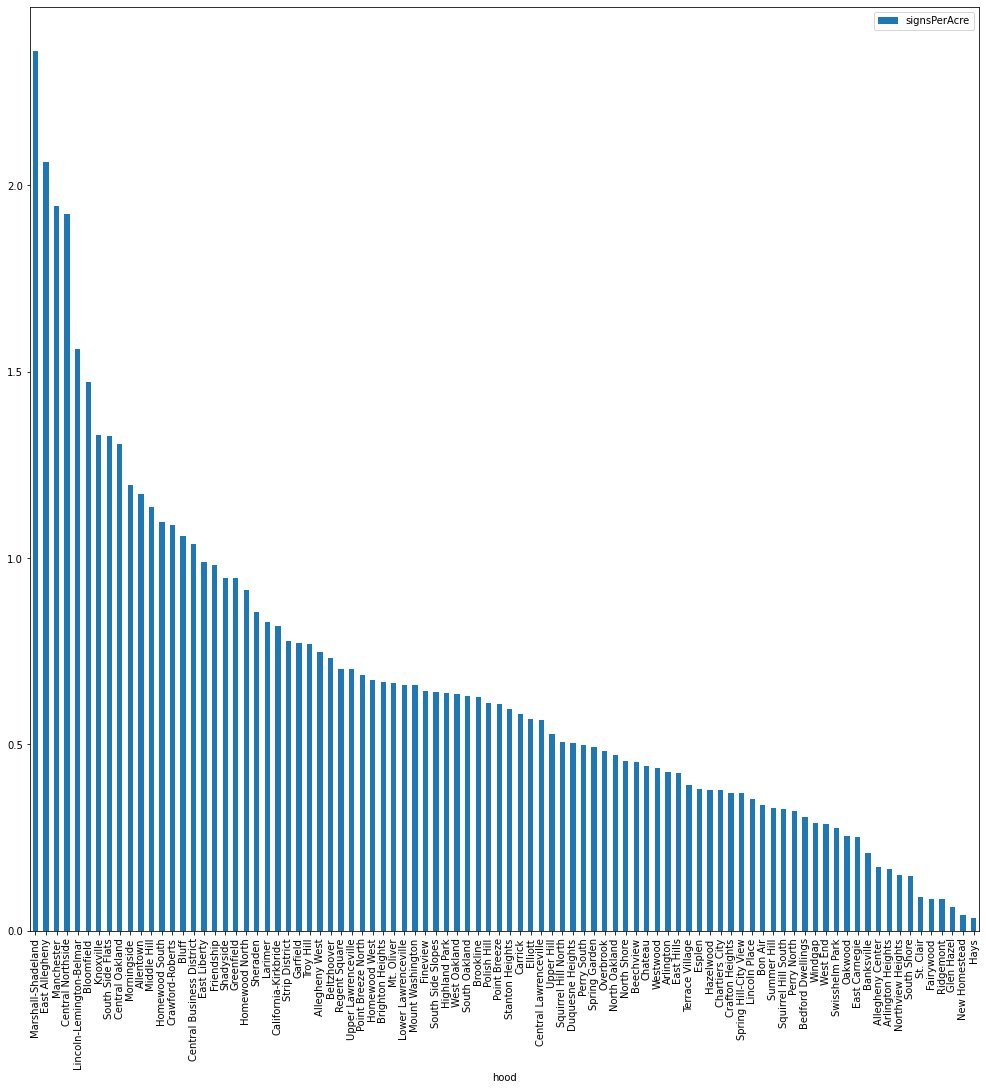

In [16]:
graphable.plot(x ='hood', y='signsPerAcre', kind = 'bar', figsize=(17, 17))

---
In conculusion Marshal-Shadeland is the best neighborhood because of the 2.361530 ratio of signs to acres

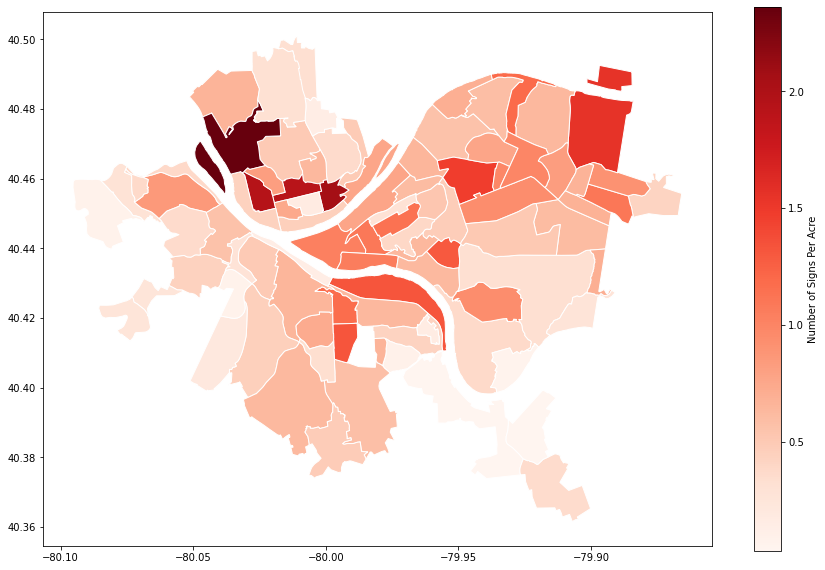

In [20]:
neighborhoods = geopandas.read_file("Neighborhood/Neighborhoods_.shp") # read in the shapefile
sign_map = neighborhoods.merge(graphable, how='left', left_on='hood', right_on='hood')
sign_map.plot(column='signsPerAcre', # set the data to be used for coloring
               cmap='Reds',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Signs Per Acre"}, # label the legend
               figsize=(15, 10),         # set the size
              # missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


In [53]:
combiner= []
for value in graphable['signsPerAcre']:
    combiner.append((value/graphable.iloc[89,1])*100)

graphable["ScaledSignsPerAcre"] =combiner
graphableDropped = graphable.drop(columns=['signsPerAcre'])
graphableDropped = graphableDropped.sort_values(by=["hood"])
graphableDropped

,hood,ScaledSignsPerAcre
0,Allegheny Center,7.230313
1,Allegheny West,31.698122
2,Allentown,49.579581
3,Arlington,18.068802
4,Arlington Heights,7.008180
...,...,...
85,Upper Lawrenceville,29.764714
86,West End,12.175886
87,West Oakland,26.930287
88,Westwood,18.460330
